# Знакомимся с новыми данными: коронавирус #

In [1]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv', sep=',')
display(covid_data.info())
display(covid_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            306429 non-null  object 
 1   province/state  228329 non-null  object 
 2   country         306429 non-null  object 
 3   confirmed       306429 non-null  float64
 4   deaths          306429 non-null  float64
 5   recovered       306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


None

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [4]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[[
    'country',
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations',
    'vaccines'
    ]]
display(vaccinations_data.info())
display(vaccinations_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   date                                 42795 non-null  object 
 2   total_vaccinations                   23457 non-null  float64
 3   people_vaccinated                    22371 non-null  float64
 4   people_vaccinated_per_hundred        22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   vaccines                             42795 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


None

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


## Предобработка данных ##

In [5]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [6]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [9]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [10]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [11]:
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [14]:
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


----

###  Задание 3.1 ###

За какой период представлены данные в таблице `covid_data`? В качестве ответа ввести даты в формате `datetime` (без указания времени в следующем формате без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

***Ответ - 2020-01-22-2021-05-29***

In [33]:
covid_data['date'].describe(datetime_is_numeric=True)

count                            86785
mean     2020-10-15 20:19:34.931151616
min                2020-01-22 00:00:00
25%                2020-06-25 00:00:00
50%                2020-10-17 00:00:00
75%                2021-02-07 00:00:00
max                2021-05-29 00:00:00
Name: date, dtype: object

----

###  Задание 3.2 ###

За какой период представлены данные в таблице `vaccinations_data`? В качестве ответа ввести даты в формате `datetime` без указания времени в формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

***Ответ - 2020-12-02-2021-09-06***

In [34]:
vaccinations_data['date'].describe(datetime_is_numeric=True)

count                            42795
mean     2021-05-21 12:12:46.182965248
min                2020-12-02 00:00:00
25%                2021-04-02 00:00:00
50%                2021-05-26 00:00:00
75%                2021-07-15 00:00:00
max                2021-09-06 00:00:00
Name: date, dtype: object

----

###  Задание 3.3 ##

С помощью метода `merge()` объединить таблицы `covid_data` и `vaccinations_data` по столбцам `date` и `country`.

Тип объединения выставить так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в **задании 3.1**. То есть в результирующую таблицу должны попасть все записи из таблицы `covid_data` и из её пересечения с `vaccinations_data`, но не более. Результат объединения занести в переменную `covid_df`.

Сохранить таблицу `covid_df` - она понадобится в следующем юните.

Сколько строк и столбцов в таблице `covid_df`? Ввести ответ в виде двух чисел через дефис (например, 333-33): первое число - количество строк, второе число - количество столбцов.

***Ответ - 86785-16***

In [35]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
display(covid_df)
display(covid_df.info())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

None

In [36]:
covid_df.to_csv('data/covid_df.csv', index=False, sep=',')

В получившейся в **задании 3.3** таблице `covid_df` создать признаки:

- `death_rate` - общий процент смертей среди зафиксированных случаев (летальность);
- `recover_rate` - общий процент случаев выздоровления.

Данные характеристики рассчитать как отношение числа смертей (`deaths`) и числа выздоровлений (`recovered`) к числу зафиксированных случаев (`confirmed`) и умножить результаты на 100%.

In [37]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

None

----

###  Задание 3.4 ###

Какова максимальная летальность в США (`United States`) за весь период? Ответ округлить до второго знака после запятой.

***Ответ - 7.19***

In [43]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

----

###  Задание 3.5 ##

Чему равен средний процент выздоровевших в России (`Russia`)? Ответ округлить до второго знака после запятой.

***Ответ - 67.06***

In [45]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

# Графические возможности библиотеки Pandas #

## Базовая визуализация в Pandas ##

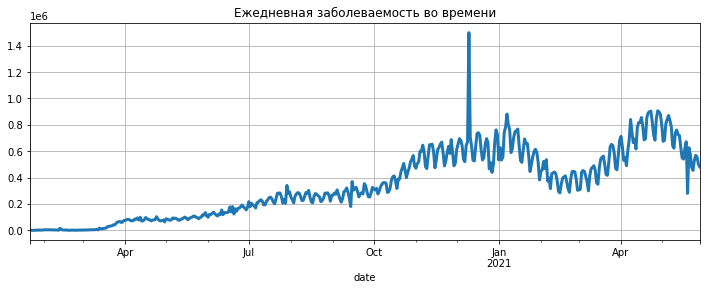

In [54]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3
);

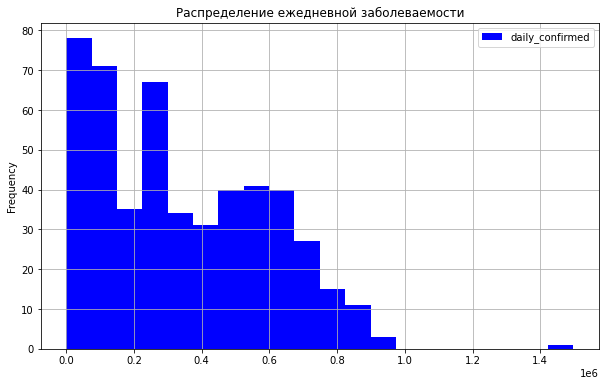

In [62]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='blue',
    legend=True,
    bins=20
);

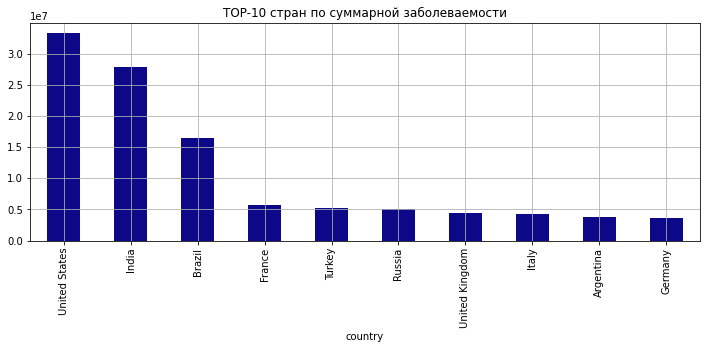

In [64]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    title='TOP-10 стран по суммарной заболеваемости',
    figsize=(12, 4),
    colormap='plasma'
);

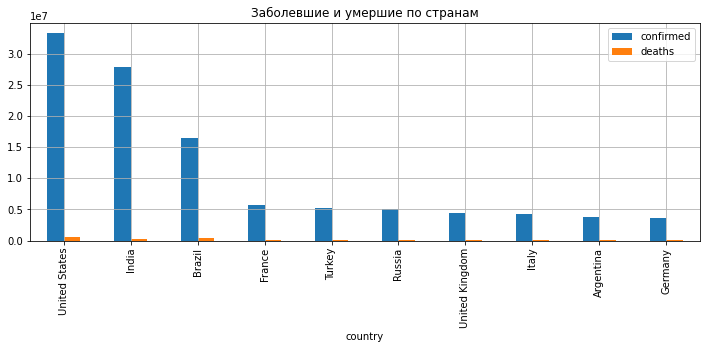

In [71]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    title='Заболевшие и умершие по странам',
    figsize=(12, 4)
);

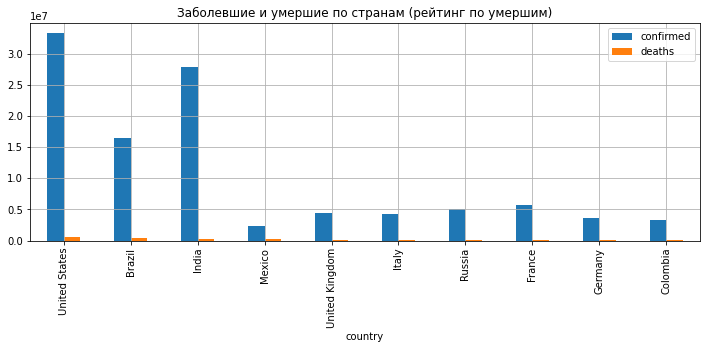

In [75]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(
    kind='bar',
    grid=True,
    title='Заболевшие и умершие по странам (рейтинг по умершим)',
    figsize=(12, 4)
);

----

###  Задание 4.1 ###

Какой параметр в методе plot() библиотеки Pandas отвечает за выбор типа визуализации?

***Ответ - kind***

----

###  Задание 4.2 ###

Параметр метода plot(), который отвечает за установку названия оси ординат?

***Ответ - ylabel***

----

###  Задание 4.3 ###

С помощью какого из перечисленных ниже вариантов кода можно получить такой график?

***Ответ ниже***

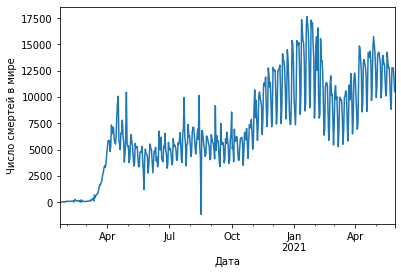

In [76]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line', xlabel='Дата', ylabel='Число смертей в мире');

----

###  Задание 4.4 ###

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (`total_vaccinations`)?

В данном задании используется метод `nsmallest()`, который позволяет выбрать **`n`** наименьших значений в Series, а также метод `last()`, с помощью которого можно получить первое непустое значение в группах.

***Ответ ниже***

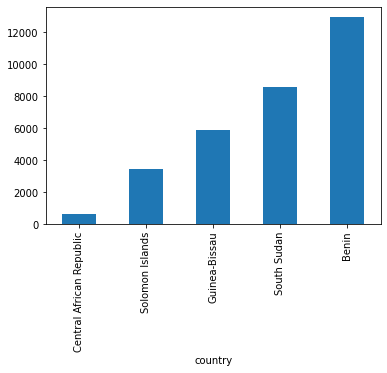

In [78]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

----

###  Задание 4.5 ###

График из **задания 4.4**. В какой стране число вакцинированных наименьшее?

***Ответ - Центральноафриканская республика*** 